# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Índice de contenido

1. **Ingesta de datos**

2. **Inspección preliminar**

2. **Duplicados**

3. **Valores faltantes**

4. **Outliers**

6. **Correlación de variables**

4. **Gráficos (variables cualitativas)** #Acompañar con analisis y profundo y conlcusiones

6. **Gráficos (variables cuantitativas)**


## 1. Ingesta de datos

### 1.1 Importamos librerías

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<p>



</p>

### 1.2 Leemos los datasets

Importamos el dataset en formato .xlsx

In [3]:
df = pd.read_excel('data/homicidios.xlsx')

<p>



</p>

## 2. Inspección preliminar del dataset

**MUESTRA**

Comenzamos con una rapida muestra de los primeros datos del dataset

In [4]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


<p>



</p>

**COLUMNAS Y FILAS**

Mediante el uso de **.shape**, vemos la cantidad de columnnas y de registros respectivamente

In [5]:
df.shape

(696, 21)

<p>



</p>

**NOMBRES DE COLUMNAS**

A continuación, bservamos los nombres de las columnas para identificar inconsistencias.

No se encuentran inconsistencias en las columnas, sus nombres son claros y comunican de forma clara lo que contienen. 

In [6]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

<p>



</p>

**TIPOS DE DATOS Y VALORES FALTANTES**

Mediante el uso de **.info()** observamos tipos de datos de cada columna y si poseen nulos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

<p>



</p>

Tenemos 4 columnas con datos faltantes. Estas son **Calle**, **Altura**, **Cruce** y **Dirección Normalizada**.

El resto de las columnas, en primera instancia, se encuentran completas.

<p>



</p>

Con respecto a los tipos de datos, encontramos iconsistencias en la columna **'HH'** la cual esta siendo reconocida como object o str cuando deberia ser un numero entero. Esta columna identifica la hora en la que ocurrio el siniestro, sin tener en cuenta los minutos con un valor valido entre 0 y 23. 

Para identificar el problema, observamos los valores unicos de la columna. 

In [8]:
df["HH"].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

<p>



</p>

Observamos que hay un valor que contiene la palabra 'SD', utlizado para identificar a un sieniestro del cual no se tiene información sobre la hora en el que sucedió. 

Para este caso, lo que haremos será imputar el valor promedio de la columna HH al resgistro que tiene valor 'SD'. Dado que es un solo valor, no debería influir en el resultado de los análisis y consideramos que es mejor mantener el registro ya que puede agregar valor. 

Para ello, buscamos el valor promedio de esa columna y lo imputamos.

In [9]:
# Creamos un dataframe nuevo que contiene la copia del original
df_prueba = df.copy()

# Eliminamos el registro que contiene la palabra 'SD'
df_prueba = df_prueba[df_prueba['HH'] != 'SD']

In [10]:
# Calculamos el promedio de la columna 'HH'
round(df_prueba['HH'].mean(),0)

12.0

<p>



</p>

El valor promedio de esta columna nos esta indicando que a las 12 del mediodía, es cuando mas accidentes ocurren. 

Con este valor, reemplazaremos el valor 'SD' en el dataframe original. 

In [11]:
df['HH'] = df['HH'].replace('SD', 12)

In [12]:
df['HH'].unique()

array([ 4,  1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6, 10, 17, 12,
        8, 20, 21, 14,  3,  2, 13])

<p>



</p>

Observamos que ya no tenemos ese valor 'SD' por lo que procedemos a convertir la columna a tipo entero.

In [13]:
df['HH'] = df['HH'].astype(int)

<p>



</p>

## 3. Duplicados


A continuación se evidencia la existencia o inexistencia de registros duplicados en el dataset. 

Como podemos observar, no existen duplicados. 

Esto es de suma importancia, ya que un dataset con valores duplicados puede sesgar el resultado de los análisis posteriores. 

In [14]:
df.duplicated().sum()

0

## 4. Valores faltantes

En este apartado se buscan los valores faltantes de cada columna y se analiza que hacer con ellos. 

Como se menciono anteriormente, existen 4 columnas con valores faltantes, de las cuales dos presentan una cantidad considerable (Altura y Cruce)

In [15]:
df.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

<p>



</p>

Columna **Altura**: la misma presenta el *81,5%* de datos faltantes. 

Tomando esto como base, procedemos a eliminar la columna. No se puede imputar valores a esa columna porque no sería información correcta o apropiada para el caso. 



In [16]:
df.drop(columns='Altura',inplace=True)

<p>



</p>

Columna **Cruce**: la misma presenta el *24,6%* de datos faltantes. 

Si observamos detenidamente la columna 'Direccion Normalizada' y la columna 'LUGAR_DEL_HECHO', observamos que tenemos la informacion completa del lugar del hecho (tanto la calle como el cruce).

Sabiendo esto y entiendo que no perdemos información, eliminamos la columna cruce.



In [17]:
df.drop(columns='Cruce',inplace=True)

<p>



</p>

Para las columnas **Calle** y **Direccion Normalizada** no tomamos acciones porque son pocos los valores faltantes. Decidimos mantener las columnas en caso de que podamos utilizarlas en la creación de KPI's y el Dashboard. 

<p>



</p>

## 5. Outliers

En esta sección identificaremos los **outliers** del dataset, es decir, aquellos valores que ***“escapan al rango en donde se concentran la mayoría de muestras"***

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. 

En este caso seran: N_VICTIMAS, AAAA, MM, DD, HH y COMUNA

<p>



</p>

 + Columna: **N_VICTIMAS**

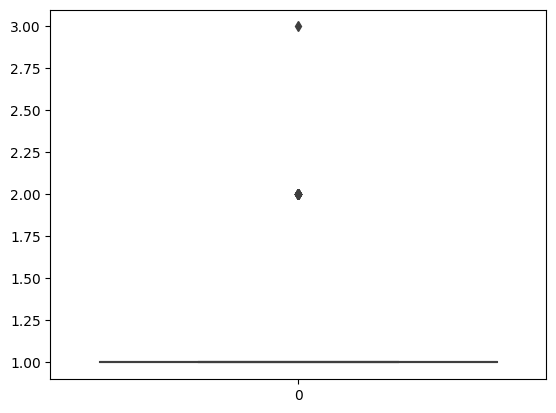

In [18]:
sns.boxplot(data=df['N_VICTIMAS'])
plt.show()

Este gráfico no logra representar correctamente lo que ocurre en la columna ya que identifica como outliers, los valores 2 y 3. 

Esto ocurre porque el 97% de los siniestros tienen una sola victima. 

Si bien para el gráfico los valores 2 y 3 son atipicos , no lo consideramos outliers y mantenemos los valores. 





<p>



</p>

Columna: **AAAA** (Año del siniestro)

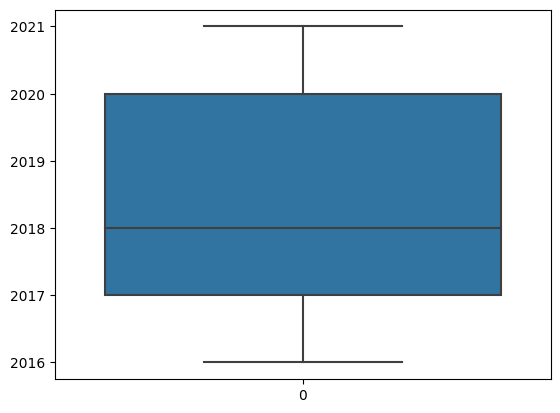

In [19]:
sns.boxplot(data=df['AAAA'])
plt.show()

A diferencia del caso anterior, en este escenario la distribución de los datos está balanceada.

A simple vista, no observamos anomalias en los datos ni valores atipicos que nos llamen la atención. 

<p>



</p>

Columnas: 
+ **MM** (Mes del siniestro)
+ **DD** (Mes del siniestro)
+ **HH** (Mes del siniestro)


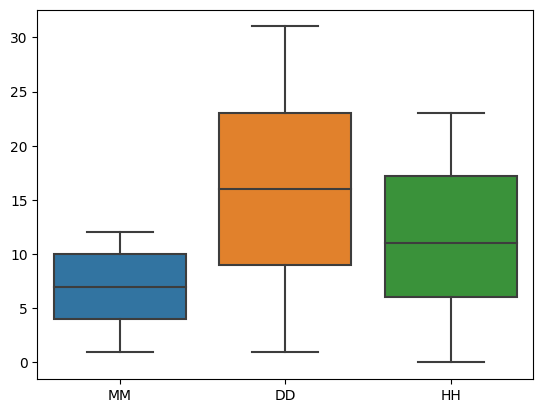

In [20]:
variables = ['MM','DD','HH']
sns.boxplot(data=df[variables])
plt.show()

De manera muy similar al caso anterior, no observamos outliers en estas columnas. 

<p>



</p>

## 6. Correlación de variables

In [22]:
variables_numericas = ['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', ]
correlation_matrix = df[variables_numericas].corr()

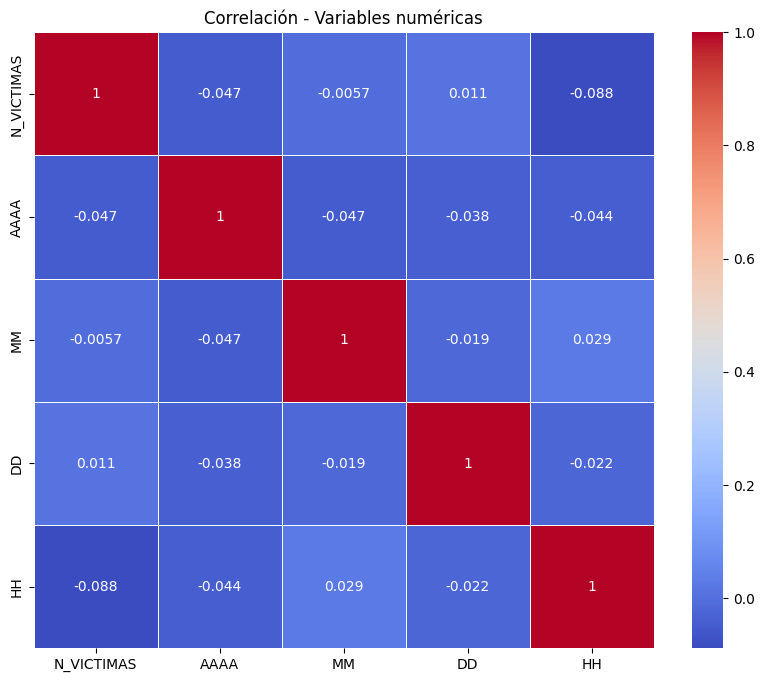

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación - Variables numéricas')
plt.show()


<p>



</p>

## 7. Gráficos (variables cualitativas)

<p>



</p>

## 8. Gráficos (variables cuantitativas)